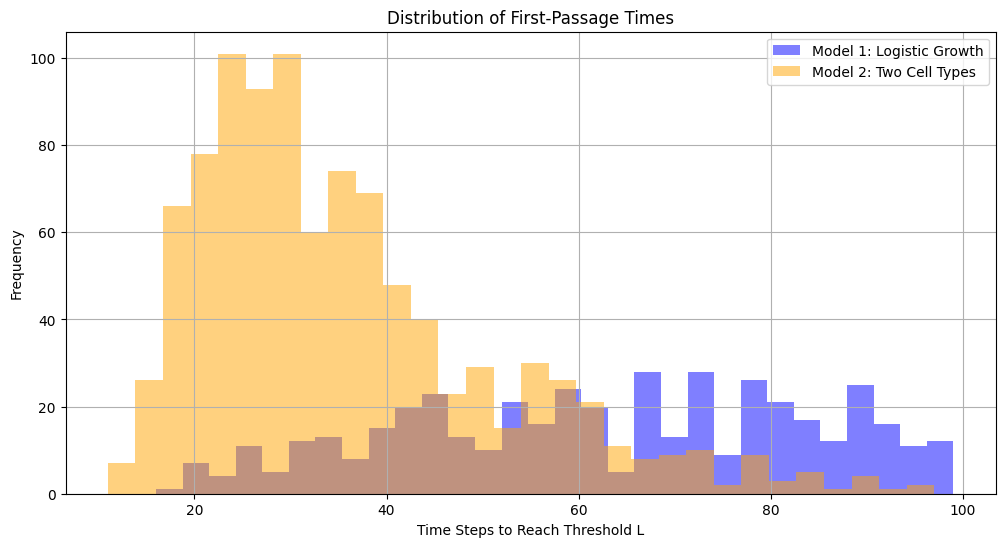

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
K = 100  # carrying capacity
L = 20   # threshold for NTCP
b = 0.1  # birth rate
d = 0.05  # natural death rate
h = 0.02  # radiation death rate
num_simulations = 1000  # number of simulations
time_steps = 100  # number of time steps in each simulation

def simulate_model_1(K, L, b, d, h, time_steps):
    N = np.zeros(time_steps)
    N[0] = K // 2  # Start with half the carrying capacity

    for t in range(1, time_steps):
        birth_events = np.random.binomial(N[t-1], b * (1 - N[t-1] / K))  # logistic growth
        death_events = np.random.binomial(N[t-1], d + h)  # natural + radiation death

        N[t] = N[t-1] + birth_events - death_events

        # Ensure population does not exceed carrying capacity or drop below zero
        N[t] = min(N[t], K)
        N[t] = max(N[t], 0)

    return N

def simulate_model_2(K, L, b, d, h, time_steps):
    N_normal = np.zeros(time_steps)
    N_doomed = np.zeros(time_steps)
    N_normal[0] = K // 2
    N_doomed[0] = K // 4

    for t in range(1, time_steps):
        birth_events_normal = np.random.binomial(N_normal[t-1], b * (1 - (N_normal[t-1] + N_doomed[t-1]) / K))
        birth_events_doomed = np.random.binomial(N_doomed[t-1], b * (1 - (N_normal[t-1] + N_doomed[t-1]) / K))

        death_events_normal = np.random.binomial(N_normal[t-1], d + h)
        death_events_doomed = np.random.binomial(N_doomed[t-1], d)  # doomed cells only die naturally

        N_normal[t] = N_normal[t-1] + birth_events_normal - death_events_normal
        N_doomed[t] = N_doomed[t-1] + birth_events_doomed - death_events_doomed

        # Ensure populations do not exceed carrying capacity or drop below zero
        N_normal[t] = min(N_normal[t], K)
        N_normal[t] = max(N_normal[t], 0)
        N_doomed[t] = min(N_doomed[t], K)
        N_doomed[t] = max(N_doomed[t], 0)

    return N_normal, N_doomed

def calculate_first_passage_time(model_func, num_simulations, K, L, b, d, h, time_steps):
    first_passage_times = []

    for _ in range(num_simulations):
        if model_func == simulate_model_1:
            population = simulate_model_1(K, L, b, d, h, time_steps)
        else:
            population_normal, population_doomed = simulate_model_2(K, L, b, d, h, time_steps)
            population = population_normal

        passage_time = next((i for i, n in enumerate(population) if n <= L), None)

        if passage_time is not None:
            first_passage_times.append(passage_time)

    return first_passage_times

# Run simulations for both models
first_passage_times_model_1 = calculate_first_passage_time(simulate_model_1, num_simulations, K, L, b, d, h, time_steps)
first_passage_times_model_2 = calculate_first_passage_time(simulate_model_2, num_simulations, K, L, b, d, h, time_steps)

# Plotting results
plt.figure(figsize=(12, 6))
plt.hist(first_passage_times_model_1, bins=30, alpha=0.5, label='Model 1: Logistic Growth', color='blue')
plt.hist(first_passage_times_model_2, bins=30, alpha=0.5, label='Model 2: Two Cell Types', color='orange')
plt.title('Distribution of First-Passage Times')
plt.xlabel('Time Steps to Reach Threshold L')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()